# Step 1: 1-D Linear Convection

The 1-D Linear Convection equation is the simplest, most basic model that can be used to learn something about CFD.

Here it is:

$$
\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0
$$


With given initial conditions (understood as a *wave*), the equation represents the propagation of that initial *wave* with speed $c$, without change of shape. Let the initial condition be $u(x,0) = u_0(x)$. Then the exact solution of the equation is $u(x,t) = u_0(x - ct)$.

We discretize this equation in both space and time, using the Forward Difference scheme for the time derivative and the Backward Difference scheme for the space derivative. Consider discretizing the spatial coordinate $x$ into points that we index from $i=0$ to $N$, and stepping in discrete time intervals of size $\Delta t$.\

From the definition of a derivative (and simply removing the limit), we know that:

$$
\frac{\partial u}{\partial x}\approx \frac{u(x+\Delta x)-u(x)}{\Delta x}
$$

Our discrete equation is:

$$
\frac{u_i^{n+1}-u_i^n}{\Delta t} + c \frac{u_i^n - u_{i-1}^n}{\Delta x} = 0 
$$

Where $n$ and $n + 1$ are two consecutive steps in time, while $i-1$ and $i$ are two neighboring points of the discretized $x$ coordinate. If there are given initial conditions, then the only unknown in this discretization is $u_i^{n+1}$. We can solve for our unknown to get an equation that allows us to advance in time, as follows:

$$
u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x}(u_i^n - u_{i-1}^n)
$$

## Imports

In [2]:
import numpy as np
from matplotlib import pyplot
import time, sys

In [3]:
# this makes matplotlib plots appear in the notebook
%matplotlib inline

## Variables

In [53]:
nx = 41           # Number of grid points
dx = 2 / (nx - 1) # Distance between any pair of adjacent grid points
nt = 25           # Number of timesteps to calculate
dt = 0.025        # Amount of time each timestep covers (delta t)
c  = 1            # Wavespeed

## Initial Conditions

The initial velocity $u_0$ is given as $u = 2$ in the interval $0.5 \leq x \leq 1$ and $u = 1$ everywhere else in $(0,2)$ (i.e a hat function)

In [54]:
u = np.ones(nx) # u is the velocity vector
u[int(0.5 // dx):int(1 // dx + 1)] = 2 # setting u = 2 between 0.5 and 1
print(u)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


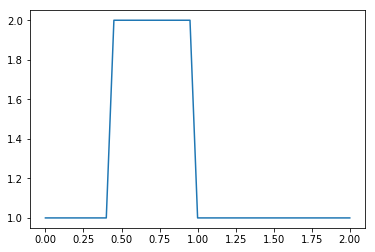

In [55]:
pyplot.plot(np.linspace(0, 2, nx), u)

## Discretization

Now it's time to implement the discretization of the convection equation using a finite-difference scheme.

For every element of our array u, we need to perform the operation: 

$$
u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n)
$$

We will store the result in a new (temporary) array *un*, which will be the solution $u$ for the next time-step. We will repeat this operation for as may time-steps as we specify and then we can see how far the wave has convected.

Start by initializing *un* to hold the values we calculate for the $n + 1$ timestep.

Then, we may think we have two iterative operations: one in space and one in time (we'll learn differently later), so we'll start by nesting one loop inside the other.

**Note:** When we write `for i in range(1, nx)` we are skipping the first element (the zero-th element). *Why?*

In [56]:
un = np.ones(nx)

for n in range(nt): 
    un = u.copy()
    for i in range(1, nx):
        u[i] = un[i] - c * dt / dx * (un[i] - un[i - 1])

**Note:** The code written as above is quite inefficient, and there are better ways to write this, Python-style.

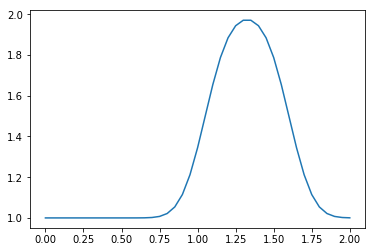

In [57]:
pyplot.plot(np.linspace(0 , 2, nx), u)